In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, f_classif  # Import SelectPercentile and f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans  # For K-Means Clustering
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC

In [ ]:
Data=pd.read_csv("/content/drive/MyDrive/Data analytics project /IoT Network Intrusion Dataset.csv")
Data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
Data.shape

(625783, 86)

In [ ]:
Data.isnull().sum().sum()

0

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [ ]:
Data.nunique()

Flow_ID     64064
Src_IP      57985
Src_Port    11205
Dst_IP        478
Dst_Port     1034
            ...  
Idle_Max    11956
Idle_Min    10872
Label           2
Cat             5
Sub_Cat         9
Length: 86, dtype: int64

In [ ]:
Data.describe(include="all")

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
count,625783,625783,625783.000000,625783,625783.000000,625783.000000,625783,625783.000000,625783.000000,625783.00000,...,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783,625783,625783
unique,64064,57985,NaN,478,NaN,NaN,4304,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,9
top,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,NaN,192.168.0.13,NaN,NaN,25/07/2019 03:25:05 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anomaly,Mirai,Mirai-UDP Flooding
freq,51852,222096,NaN,164532,NaN,NaN,3189,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585710,415677,183554
mean,NaN,NaN,35026.156190,NaN,16387.027479,9.971436,NaN,635.422865,1.675566,1.46853,...,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459,NaN,NaN,NaN
std,NaN,NaN,24721.047752,NaN,17550.363037,5.379857,NaN,3496.740723,4.309970,1.21949,...,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,9020.000000,NaN,8899.000000,6.000000,NaN,76.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000,NaN,NaN,NaN
50%,NaN,NaN,51991.000000,NaN,9020.000000,6.000000,NaN,132.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000,NaN,NaN,NaN
75%,NaN,NaN,56361.000000,NaN,10101.000000,17.000000,NaN,221.000000,2.000000,2.00000,...,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000,NaN,NaN,NaN


In [ ]:
Data.duplicated().sum()

164087

In [ ]:
TempData=Data.copy()
TempData.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
TempData = TempData.drop_duplicates()
TempData

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625773,192.168.0.24-210.89.164.90-60165-8899-17,192.168.0.24,60165,210.89.164.90,8899,17,25/07/2019 03:21:00 AM,29,5,1,...,0.0,0.0,0.0,5.8,3.346640,11.0,3.0,Anomaly,Mirai,Mirai-UDP Flooding
625776,192.168.0.24-111.57.139.118-19604-8739-6,111.57.139.118,8739,192.168.0.24,19604,6,04/06/2019 11:44:26 PM,1092,0,2,...,0.0,0.0,0.0,1092.0,0.000000,1092.0,1092.0,Anomaly,DoS,DoS-Synflooding
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding


In [ ]:
TempData.duplicated().sum()

0

In [ ]:
OneUnique = TempData.nunique() == 1
VarRange1 = OneUnique[OneUnique == True]
VarRange1OneUn

Fwd_PSH_Flags        True
Fwd_URG_Flags        True
Fwd_Byts/b_Avg       True
Fwd_Pkts/b_Avg       True
Fwd_Blk_Rate_Avg     True
Bwd_Byts/b_Avg       True
Bwd_Pkts/b_Avg       True
Bwd_Blk_Rate_Avg     True
Init_Fwd_Win_Byts    True
Fwd_Seg_Size_Min     True
dtype: bool

In [ ]:
ColumnsToDrop = ['Fwd_PSH_Flags','Fwd_URG_Flags','Fwd_Byts/b_Avg','Fwd_Pkts/b_Avg','Fwd_Blk_Rate_Avg'
                ,'Bwd_Byts/b_Avg','Bwd_Pkts/b_Avg','Bwd_Blk_Rate_Avg','Init_Fwd_Win_Byts','Fwd_Seg_Size_Min']

In [ ]:
for col in ColumnsToDrop:
  del TempData[col]

In [ ]:
TempData.shape

(461696, 76)

In [ ]:
OneUniqueCheck = TempData.nunique() == 1
VarRange_1 = OneUniqueCheck[OneUniqueCheck == True]
VarRange_1

Series([], dtype: bool)

In [ ]:
columns = TempData.columns.tolist()
cat_columns = TempData.select_dtypes(['object']).columns
label_encoder = LabelEncoder()
TempData[cat_columns] = TempData[cat_columns].apply(lambda x: label_encoder.fit_transform(x.astype(str)))

In [ ]:
TempData.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446,25883,10000,203,10101,17,3496,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0,2,2
1,22760,34617,2179,200,554,6,3664,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0,0,0
2,12691,25886,52727,200,9020,6,2082,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0,4,8
3,12704,25886,52964,200,9020,6,791,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,0,2,4
4,611,25881,36763,317,1900,17,1040,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,0,2,4


In [ ]:
# storing the input values in the X variable
X = TempData.drop(["Cat"], axis=1)

# storing all the ouputs in y variable
y = TempData["Cat"]

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np


# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Create a Decision Tree classifier
DT = DecisionTreeClassifier()

# Create a feature selector based on SelectFromModel using a Random Forest classifier
selector = SelectFromModel(estimator=RandomForestClassifier())

# Fit the selector to the data
X_selected = selector.fit_transform(X_scaled, y)

# Get the total number of selected features
num_features = X_selected.shape[1]

# Create a DataFrame to store results
result = pd.DataFrame(columns=['k', 'Acc', 'P', 'R', 'F1'])

for i in range(1, num_features + 1):
    acc = []
    pre = []
    recall = []
    f1 = []

    for rand in range(15):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=rand)

        # Create a Decision Tree classifier
        DT = DecisionTreeClassifier()

        # Fit the Decision Tree classifier on the selected features
        DT.fit(X_train, y_train)

        # Predict using the test data
        y_pred = DT.predict(X_test)

        # Calculate evaluation metrics
        precision_ = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall_ = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1_ = f1_score(y_test, y_pred, average='macro', zero_division=0)
        accuracy_ = accuracy_score(y_test, y_pred)

        acc.append(accuracy_)
        pre.append(precision_)
        recall.append(recall_)
        f1.append(f1_)

    result.loc[len(result)] = [i, np.mean(acc), np.mean(pre), np.mean(recall), np.mean(f1)]

# Display the results
result

,k,Acc,P,R,F1
0,1.0,0.999964,0.999875,0.999887,0.999881
1,2.0,0.999967,0.999892,0.999894,0.999893
2,3.0,0.999970,0.999907,0.999898,0.999903
3,4.0,0.999969,0.999897,0.999900,0.999898
4,5.0,0.999970,0.999905,0.999898,0.999901
5,6.0,0.999967,0.999889,0.999894,0.999891
6,7.0,0.999968,0.999894,0.999894,0.999894
7,8.0,0.999969,0.999897,0.999900,0.999899
8,9.0,0.999968,0.999892,0.999897,0.999894
9,10.0,0.999968,0.999892,0.999899,0.999896


In [ ]:
sorted_res=result.sort_values(by=['F1','Acc'],ascending=[False, False])

sorted_res

,k,Acc,P,R,F1
2,3.0,0.999970,0.999907,0.999898,0.999903
4,5.0,0.999970,0.999905,0.999898,0.999901
7,8.0,0.999969,0.999897,0.999900,0.999899
11,12.0,0.999969,0.999897,0.999900,0.999898
3,4.0,0.999969,0.999897,0.999900,0.999898
13,14.0,0.999968,0.999897,0.999895,0.999896
9,10.0,0.999968,0.999892,0.999899,0.999896
6,7.0,0.999968,0.999894,0.999894,0.999894
8,9.0,0.999968,0.999892,0.999897,0.999894
1,2.0,0.999967,0.999892,0.999894,0.999893


In [ ]:
optimal_k=sorted_res.iloc[0]['k']
optimal_k

3.0

In [ ]:
classifiers={
    "Decision Tree":DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=6),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machines":LinearSVC()

}

In [ ]:
all_results = pd.DataFrame(columns=['classifier', 'Acc', 'P', 'R', 'F1'])
avg_results = pd.DataFrame(columns=['classifier', 'Acc', 'P', 'R', 'F1'])

for classifier_name, class_obj in classifiers.items():
    acc = []
    pre = []
    recall = []
    f1 = []

    for r in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=r)

        # Handle missing values by imputing with the mean
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        selector = SelectKBest(f_regression, k=int(optimal_k))
        X_train_selected = selector.fit_transform(X_train_imputed, y_train)
        X_test_selected = selector.transform(X_test_imputed)

        class_obj.fit(X_train_selected, y_train)
        y_pred = class_obj.predict(X_test_selected)

        precision_ = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall_ = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1_ = f1_score(y_test, y_pred, average='macro', zero_division=0)
        accuracy_ = accuracy_score(y_test, y_pred)

        acc.append(accuracy_)
        pre.append(precision_)
        recall.append(recall_)
        f1.append(f1_)

        all_results.loc[len(all_results)] = [classifier_name, accuracy_, precision_, recall_, f1_]

    avg_results.loc[len(avg_results)] = [classifier_name, np.mean(acc), np.mean(pre), np.mean(recall), np.mean(f1)]

avg_results

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

,classifier,Acc,P,R,F1
0,Decision Tree,0.986045,0.991774,0.917351,0.950883
1,Naive Bayes,0.865601,0.674962,0.851092,0.715950
2,KNN,0.985458,0.990224,0.914861,0.948752
3,Random Forest,0.985993,0.991737,0.917049,0.950686
4,Support Vector Machines,0.931464,0.891799,0.608864,0.657498


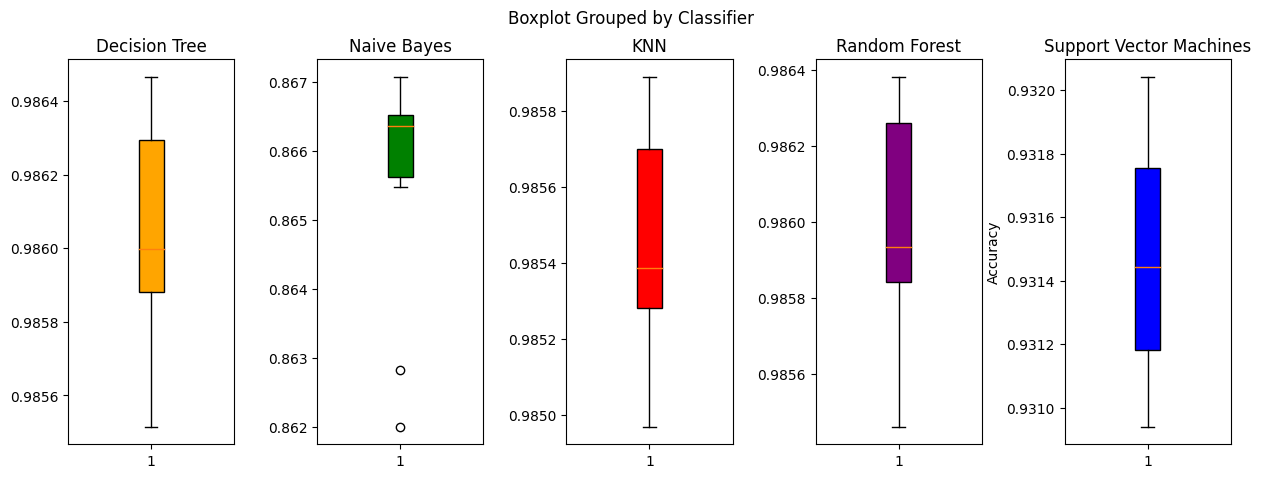

In [ ]:
# Assuming all_results is a DataFrame containing your data

# Count the unique classifiers
n_classifiers = all_results['classifier'].nunique()

# Create a single figure with multiple subplots (one per classifier)
fig, axes = plt.subplots(1, n_classifiers, figsize=(15, 5))

# List of colors
colors = ['orange', 'green', 'red', 'purple', 'blue', 'pink']

# Iterate through unique classifiers
for i, classifier in enumerate(all_results['classifier'].unique()):
    subset = all_results[all_results['classifier'] == classifier]

    # Use Matplotlib's boxplot function directly
    axes[i].boxplot(subset['Acc'], patch_artist=True,
                    boxprops=dict(facecolor=colors[i % len(colors)]))

    # Set the title of the i-th subplot
    axes[i].set_title(classifier)
fig.subplots_adjust(wspace=0.5)  # Adjust the width spacing
plt.suptitle('Boxplot Grouped by Classifier')
plt.ylabel('Accuracy')
plt.show()

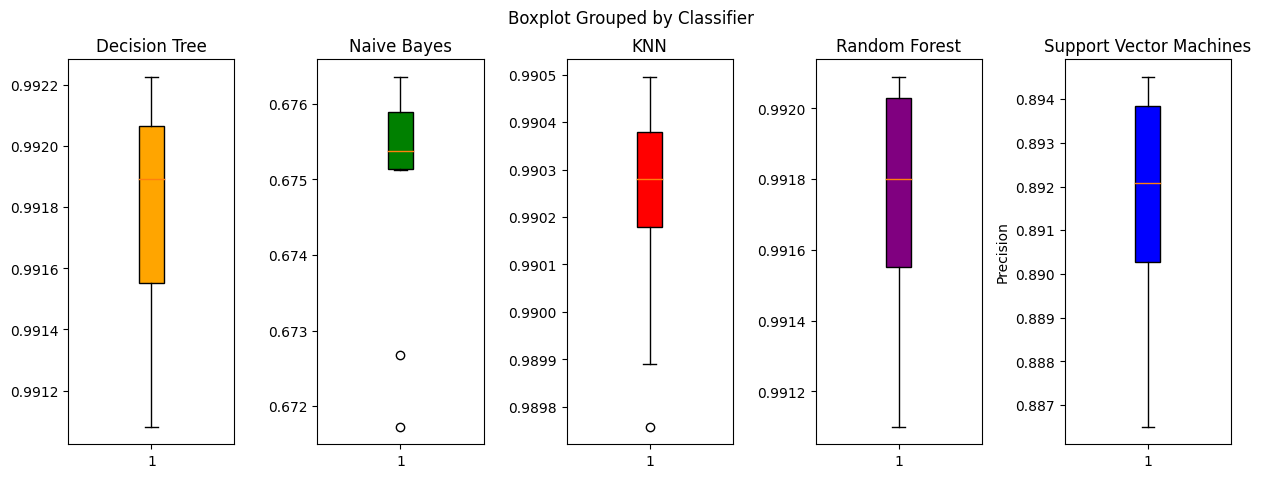

In [ ]:
# Assuming all_results is a DataFrame containing your data

# Count the unique classifiers
n_classifiers = all_results['classifier'].nunique()

# Create a single figure with multiple subplots (one per classifier)
fig, axes = plt.subplots(1, n_classifiers, figsize=(15, 5))

# List of colors
colors = ['orange', 'green', 'red', 'purple', 'blue', 'pink']

# Iterate through unique classifiers
for i, classifier in enumerate(all_results['classifier'].unique()):
    subset = all_results[all_results['classifier'] == classifier]

    # Use Matplotlib's boxplot function directly
    axes[i].boxplot(subset['P'], patch_artist=True,
                    boxprops=dict(facecolor=colors[i % len(colors)]))

    # Set the title of the i-th subplot
    axes[i].set_title(classifier)
fig.subplots_adjust(wspace=0.5)  # Adjust the width spacing
plt.suptitle('Boxplot Grouped by Classifier')
plt.ylabel('Precision')
plt.show()

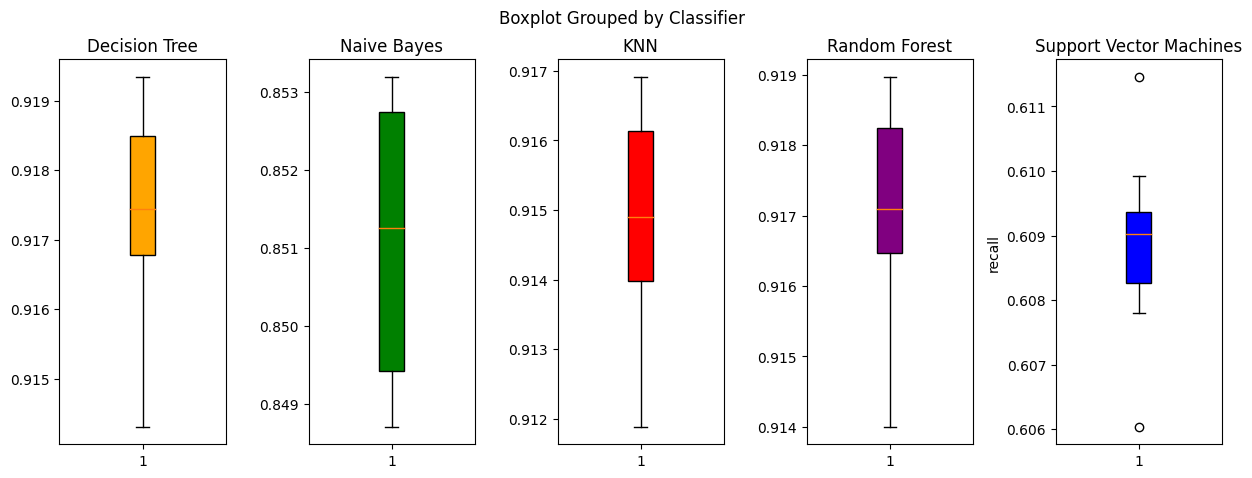

In [ ]:
# Assuming all_results is a DataFrame containing your data

# Count the unique classifiers
n_classifiers = all_results['classifier'].nunique()

# Create a single figure with multiple subplots (one per classifier)
fig, axes = plt.subplots(1, n_classifiers, figsize=(15, 5))

# List of colors
colors = ['orange', 'green', 'red', 'purple', 'blue', 'pink']

# Iterate through unique classifiers
for i, classifier in enumerate(all_results['classifier'].unique()):
    subset = all_results[all_results['classifier'] == classifier]

    # Use Matplotlib's boxplot function directly
    axes[i].boxplot(subset['R'], patch_artist=True,
                    boxprops=dict(facecolor=colors[i % len(colors)]))

    # Set the title of the i-th subplot
    axes[i].set_title(classifier)
fig.subplots_adjust(wspace=0.5)  # Adjust the width spacing
plt.suptitle('Boxplot Grouped by Classifier')
plt.ylabel('recall')
plt.show()

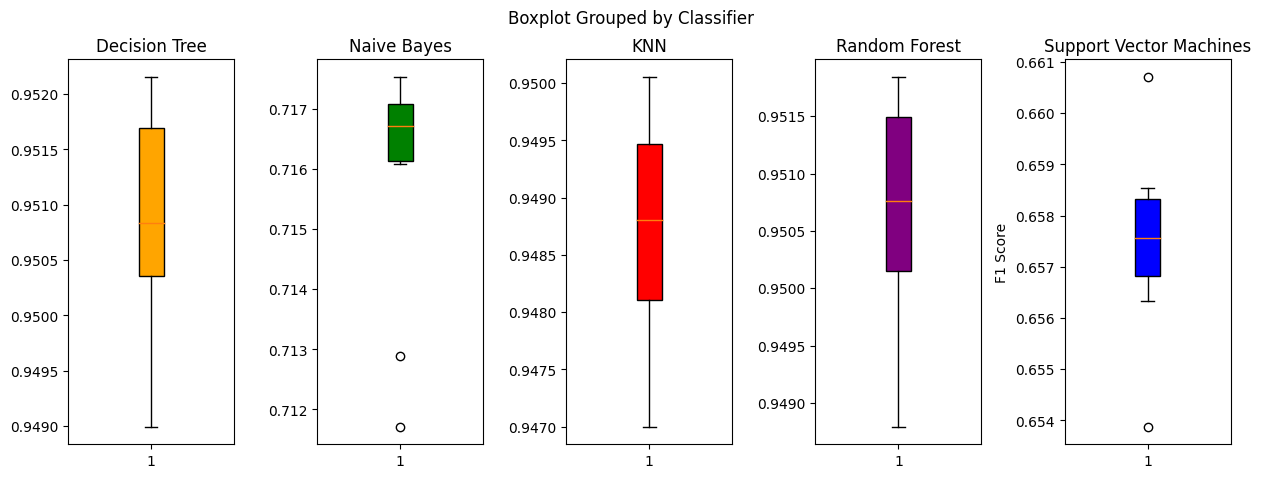

In [ ]:
# Count the unique classifiers
n_classifiers = all_results['classifier'].nunique()

# Create a single figure with multiple subplots (one per classifier)
fig, axes = plt.subplots(1, n_classifiers, figsize=(15, 5))

# List of colors
colors = ['orange', 'green', 'red', 'purple', 'blue', 'pink']

# Iterate through unique classifiers
for i, classifier in enumerate(all_results['classifier'].unique()):
    subset = all_results[all_results['classifier'] == classifier]

    # Use Matplotlib's boxplot function directly
    axes[i].boxplot(subset['F1'], patch_artist=True,
                    boxprops=dict(facecolor=colors[i % len(colors)]))

    # Set the title of the i-th subplot
    axes[i].set_title(classifier)
fig.subplots_adjust(wspace=0.5)  # Adjust the width spacing
plt.suptitle('Boxplot Grouped by Classifier')
plt.ylabel('F1 Score')

plt.show()

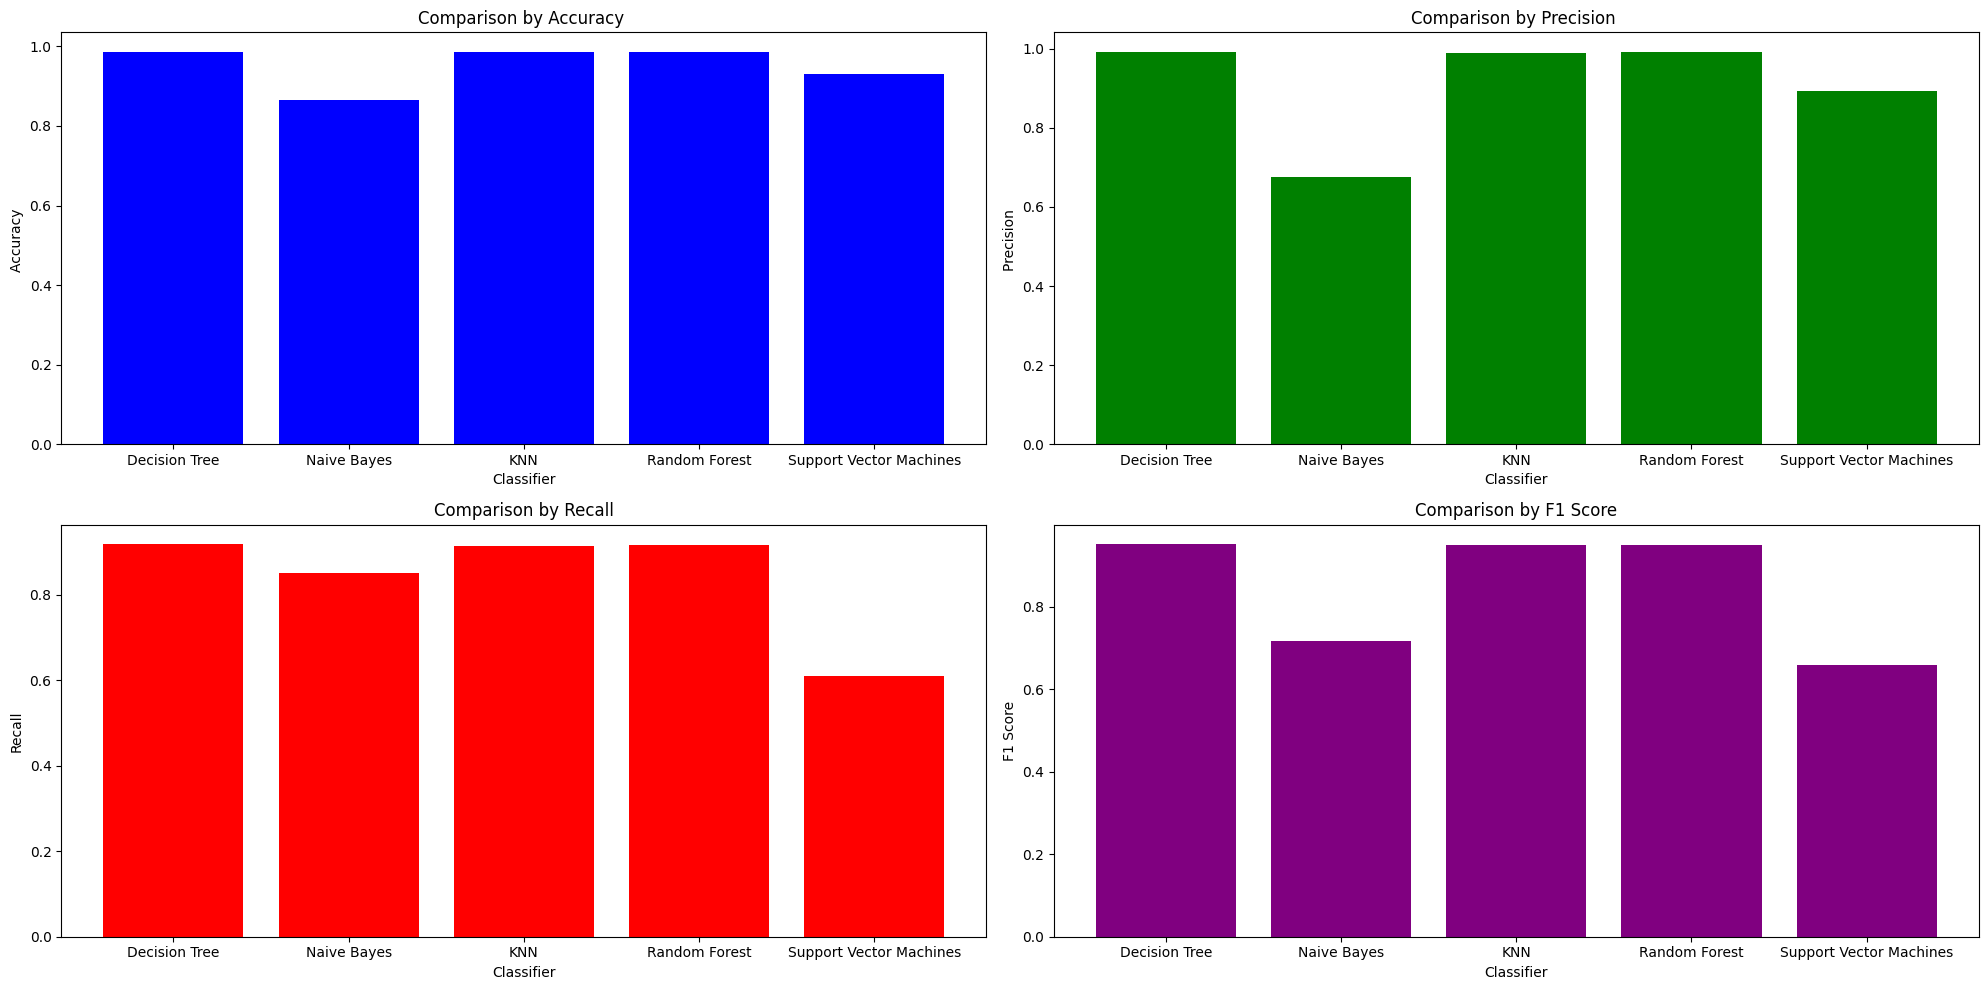

In [ ]:
# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


# Flatten the axs array for easy iteration
axs = axs.flatten()

# Metrics to plot
metrics = ['Acc', 'P', 'R', 'F1']
metrics_ = ['Accuracy ', 'Precision ', 'Recall', 'F1 Score']
# Colors for each metric
colors = ['blue', 'green', 'red', 'purple']
# Loop through the metrics and plot them
for i, metric in enumerate(metrics):
    axs[i].bar(avg_results['classifier'], avg_results[metric], color=colors[i])
    axs[i].set_title(f'Comparison by {metrics_[i]}')
    axs[i].set_ylabel(f'{metrics_[i]}')
    axs[i].set_xlabel('Classifier')


# Add space between subplots for better layout
plt.tight_layout()

# Show the plot



plt.show()